# Real-Time Order Risk Prediction System


### BUSINESS CONTEXT:
<p> You work for "QuickBite Delivery", a food delivery platform operating in metro cities.</p>
The company is facing:
<ol>
<li>High cancellation rates (orders not reaching customers)
<li>Inefficient rider allocation leading to delayed deliveries</li>
<li>Rider performance issues affecting customer satisfaction</li>
</ol>
<b><i>Your Mission: Build predictive model to identify which orders will get cancel.</i></b> <br>
Dataset : <a>https://www.kaggle.com/datasets/cbhavik/swiggyzomato-order-information/data</a><br><br>
Description:
<ul>
<li><b>order_id:</b> unique id for each order
<li><b>order_time:</b> time of the creation of order by the client
<li><b>order_date:</b> date of the order
<li><b>allot_time:</b> time of allocation of order to the rider
<li><b>accept_time:</b> time of acceptance of the order by the rider (if available)
<li><b>pickup_time:</b> time of pickup of the order (if available)
<li><b>delivered_time:</b> time of delivery of the order (if available)
<li><b>cancelled_time:</b> time of cancellation of order (if the order was cancelled)
<li><b>cancelled:</b> whether the order was cancelled
<li><b>rider_id:</b> unique id for each rider
<li><b>first_miledistance:</b> road distance from rider’s location to the pickup location
<li><b>last_miledistance:</b> road distance from pickup location to the delivery location
<li><b>allotted_orders:</b> total number of orders allotted to the rider in the 30 days before (not
including) orderdate
<li><b>delivered_orders:</b> total number of orders delivered by the rider in the 30 days before (not
including) order_date -date
<li><b>undelivered_orders:</b> total number of orders allotted to but not delivered by the rider (i.e.
cancelled) in the 30 days before (not including) orderdate
<li><b>lifetime_ordercount:</b> total number of orders delivered by the rider at any time before
orderdate
<li><b>reassigned_order:</b> whether the order was reassigned to this rider
<li><b>reassignment_method:</b> if the order was reassigned, whether the reassignment was done
manually (by the ops team) or automatically
<li><b>reassignment_reason:</b> a more detailed reason for the reassignment
<li><b>session_time:</b> total time the rider had been online on orderdate before ordertime</li></ul>

## Data Loading & Basic Checks
<ul>
<li>Load the dataset into pandas
<li>Check for missing values in each column
<li>Identify data types and convert datetime columns
<li>Check for duplicates in  order_id</ul>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Rider-Info.csv')
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [4]:
df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [6]:
df.isnull().sum().sort_values(ascending=False)

cancelled_time          444782
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
delivered_orders         17341
undelivered_orders       17341
alloted_orders           16948
delivered_time            5218
session_time              3675
pickup_time               2421
accept_time                157
lifetime_order_count        53
allot_time                   0
order_date                   0
order_id                     0
order_time                   0
first_mile_distance          0
last_mile_distance           0
rider_id                     0
cancelled                    0
dtype: int64

In [7]:
time_cols = [
    'order_time', 'order_date',
    'allot_time', 'accept_time',  
    'pickup_time', 'delivered_time'
]

# Slower method----------->
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [8]:
# FASTER WAY--------------->
df[time_cols] = df[time_cols].apply(pd.to_datetime, errors='coerce')


In [9]:
df[df.duplicated(subset = "order_id")]

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
420456,2021-02-05 15:06:30,181402,2021-02-05,2021-02-05 16:32:56,2021-02-05 16:33:16,NaT,NaT,14538,2.6168,1.24,72.0,72.0,1,0.0,244.0,auto,Reassign,1.0,96.5,2021-02-05 16:59:52


In [10]:
df[df['order_id'] == 181402]

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
420455,2021-02-05 15:06:30,181402,2021-02-05,2021-02-05 16:32:56,2021-02-05 16:33:16,NaT,NaT,14538,2.6168,1.24,72.0,72.0,1,0.0,244.0,auto,Reassign,1.0,96.5,2021-02-05 16:59:52
420456,2021-02-05 15:06:30,181402,2021-02-05,2021-02-05 16:32:56,2021-02-05 16:33:16,NaT,NaT,14538,2.6168,1.24,72.0,72.0,1,0.0,244.0,auto,Reassign,1.0,96.5,2021-02-05 16:59:52


In [11]:
df = df.drop_duplicates(subset="order_id")

## <u>Delivery Timeline Analysis</u>
### Calculate time intervals:
<ul>
<li>order_to_allot: allot_time - order_time</li>
<li>allot_to_accept: accept_time - allot_time (if available)</li>
<li>accept_to_pickup: pickup_time - accept_time (if available)</li>
<li>pickup_to_delivery: delivered_time - pickup_time (if available)</li>
<li>total_delivery_time: delivered_time - order_time (for delivered orders)</ul>

### Create visualizations:
<ul><li>Distribution of each time interval (histograms)</li>
<li>Average time intervals by hour of day</li>
<li>Weekday vs weekend comparisons</ul>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def safe_diff(end, start):
    """Compute difference in minutes, handling nulls and negatives."""
    if pd.isna(end) or pd.isna(start):
        return np.nan
    diff = (end - start).total_seconds() / 60
    return diff if diff >= 0 else np.nan

In [14]:
df["order_to_allot"] = df.apply(lambda x: safe_diff(x["allot_time"], x["order_time"]), axis=1)
df["allot_to_accept"] = df.apply(lambda x: safe_diff(x["accept_time"], x["allot_time"]), axis=1)
df["accept_to_pickup"] = df.apply(lambda x: safe_diff(x["pickup_time"], x["accept_time"]), axis=1)
df["pickup_to_delivery"] = df.apply(lambda x: safe_diff(x["delivered_time"], x["pickup_time"]), axis=1)
df["order_to_delivery"] = df.apply(lambda x: safe_diff(x["delivered_time"], x["order_time"]), axis=1)

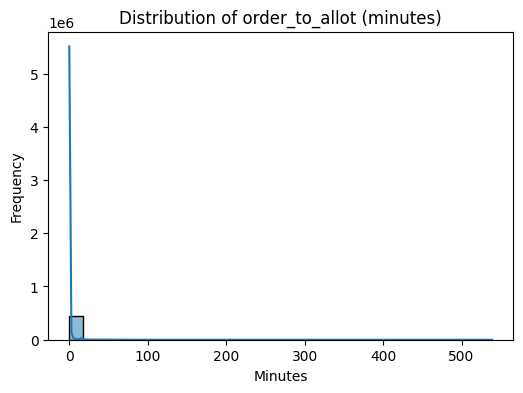

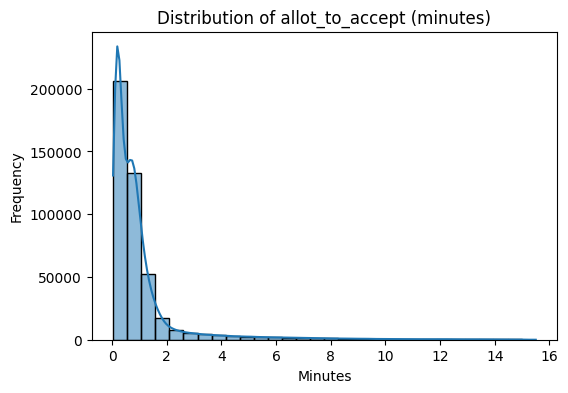

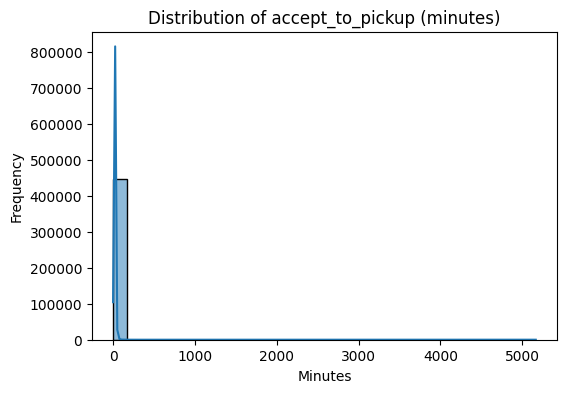

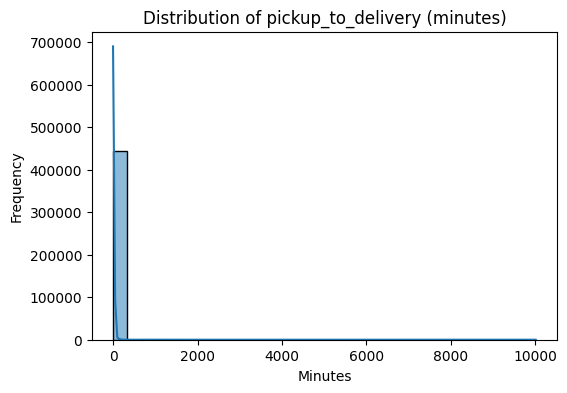

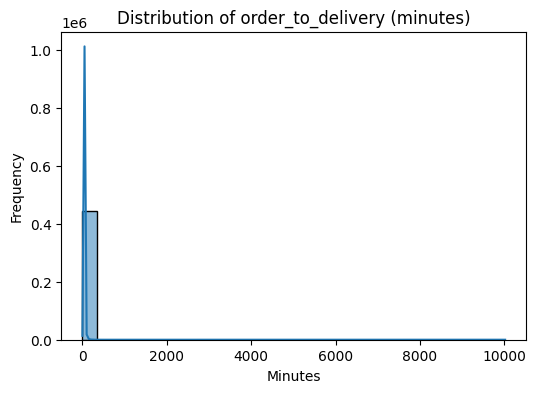

In [15]:
intervals = ["order_to_allot", "allot_to_accept", "accept_to_pickup", "pickup_to_delivery", "order_to_delivery"]

for col in intervals:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col} (minutes)")
    plt.xlabel("Minutes")
    plt.ylabel("Frequency")
    plt.show()

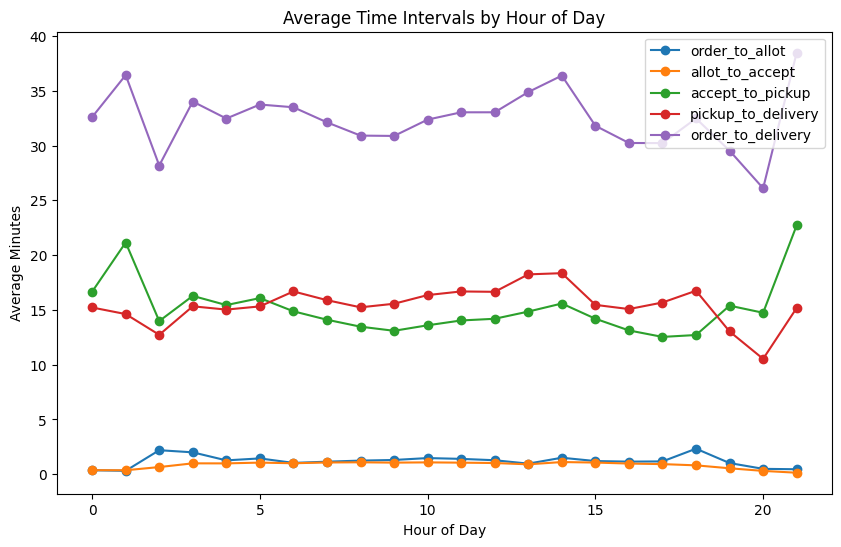

In [16]:
df["order_hour"] = df["order_time"].dt.hour

intervals = ["order_to_allot", "allot_to_accept", "accept_to_pickup", "pickup_to_delivery", "order_to_delivery"]
avg_by_hour = df.groupby("order_hour")[intervals].mean()

plt.figure(figsize=(10,6))
for col in intervals:
    plt.plot(avg_by_hour.index, avg_by_hour[col], marker="o", label=col)
plt.title("Average Time Intervals by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Minutes")
plt.legend()

In [17]:
df['is_weekend'] = df['order_time'].dt.dayofweek >= 5

<Figure size 1000x600 with 0 Axes>

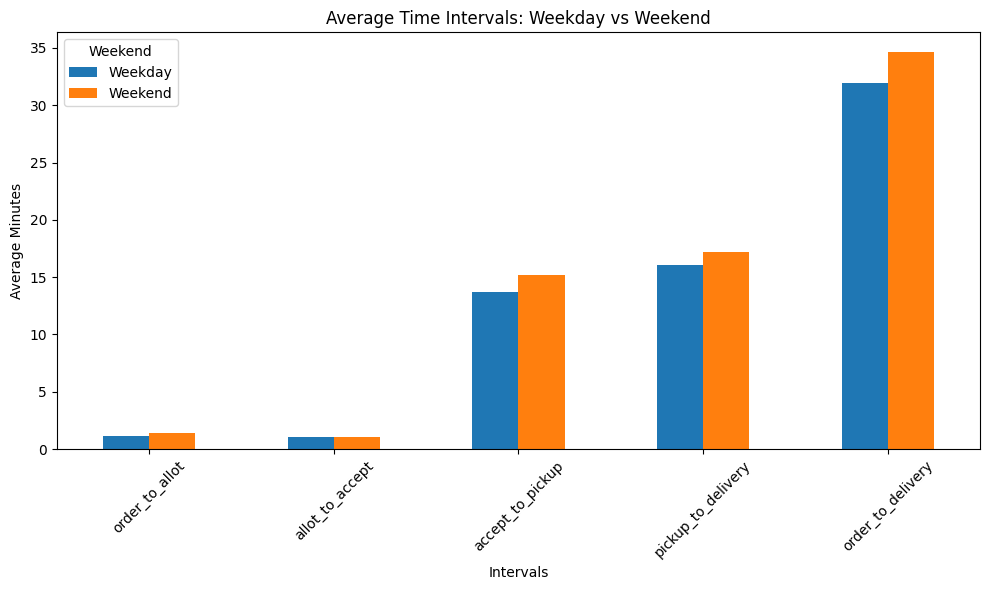

In [18]:
# Avrages for weekday vs weekend
avg_week = df.groupby("is_weekend")[intervals].mean().T

plt.figure(figsize=(10,6))
avg_week.plot(kind="bar", figsize=(10,6))
plt.title("Average Time Intervals: Weekday vs Weekend")
plt.xlabel("Intervals")
plt.ylabel("Average Minutes")
plt.xticks(rotation=45)
plt.legend(title="Weekend", labels=["Weekday", "Weekend"])
plt.tight_layout()
plt.show()

## Cancellation Analysis
<ul><li>What percentage of orders are cancelled?</li>
<li>At what stage do cancellations happen most? (before accept, after accept, after pickup)</li>
<li>Is cancellation rate higher for certain riders?</li></ul>

In [19]:
# Percentage of cancelled orders
cancel_rate = df["cancelled"].mean() * 100
print(f"Cancelled orders: {cancel_rate:.2f}%")

Cancelled orders: 1.16%


In [20]:
def cancellation_stage(row):
    if row["cancelled"] == 1:
        if pd.isnull(row["accept_time"]):
            return "Before Accept"
        elif pd.notnull(row["accept_time"]) and pd.isnull(row["pickup_time"]):
            return "After Accept"
        elif pd.notnull(row["pickup_time"]) and pd.isnull(row["delivered_time"]):
            return "After Pickup"
    return None

df["cancel_stage"] = df.apply(cancellation_stage, axis=1)

stage_counts = df["cancel_stage"].value_counts(normalize=True) * 100
print(stage_counts)

cancel_stage
After Pickup     53.613188
After Accept     43.377420
Before Accept     3.009392
Name: proportion, dtype: float64


In [21]:
# Cancellation rate per rider
rider_cancel_rate = df.groupby("rider_id")["cancelled"].mean() * 100

# Top 10 riders with highest cancellation rate
top_riders = rider_cancel_rate.sort_values(ascending=False).head(10)
print(top_riders)

rider_id
21549    100.0
3117     100.0
21395    100.0
21396    100.0
21409    100.0
17743    100.0
17738    100.0
17689    100.0
17667    100.0
17629    100.0
Name: cancelled, dtype: float64


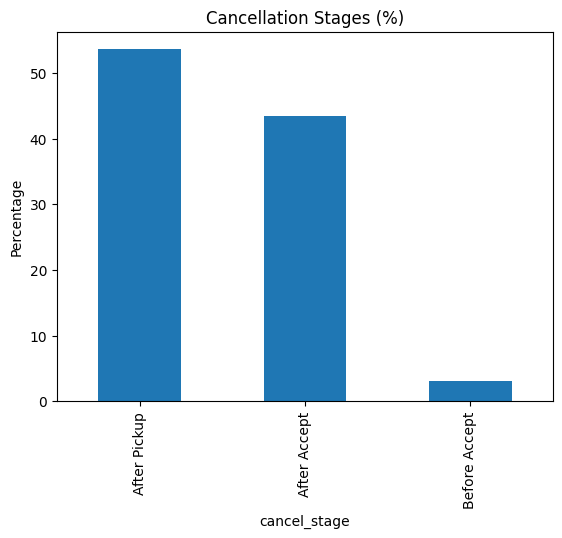

In [22]:
stage_counts.plot(kind="bar", title="Cancellation Stages (%)")
plt.ylabel("Percentage")
plt.show()

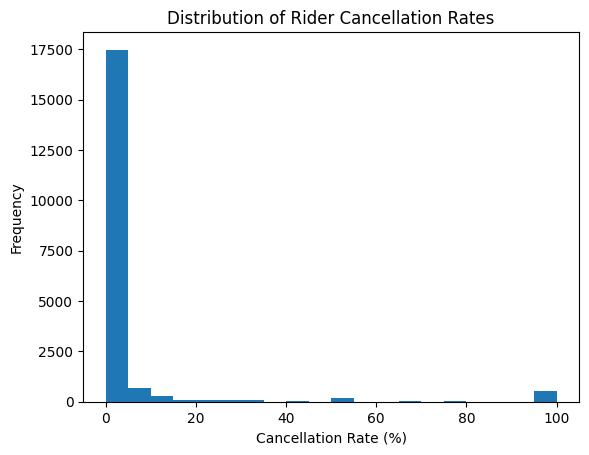

In [23]:
rider_cancel_rate.plot(kind="hist", bins=20, title="Distribution of Rider Cancellation Rates")
plt.xlabel("Cancellation Rate (%)")
plt.show()

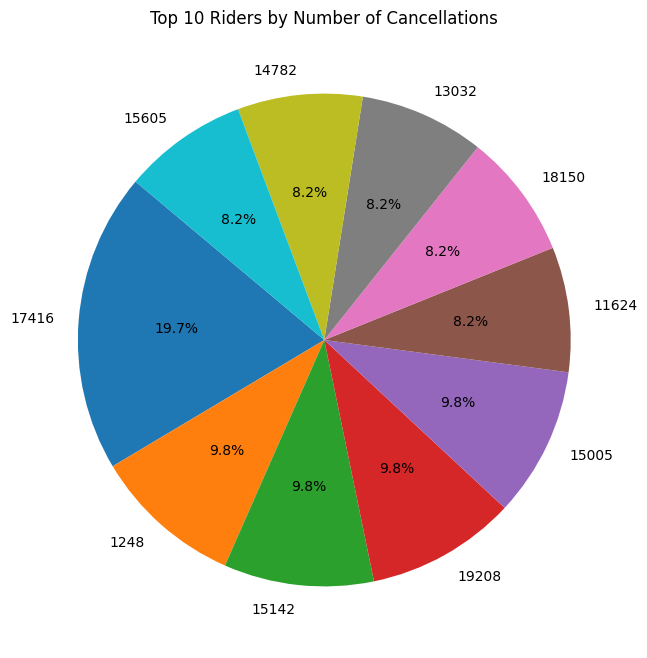

In [24]:
# Count cancellations per rider
rider_cancel_counts = df.groupby("rider_id")["cancelled"].sum()

# Sort by highest cancellations and take top 10
top_riders = rider_cancel_counts.sort_values(ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top_riders, labels=top_riders.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Riders by Number of Cancellations")
plt.show()

## Rider Performance Metrics
- Calculate for each rider:
    - Delivery success rate = delivered_orders / (delivered_orders + undelivered_orders)
    - Average delivery time (for completed deliveries)
    - Cancellation rate
- Identify: Top 10% performers vs Bottom 10% performers

In [ ]:
df["success_rate"] = df["delivered_orders"] / (df["delivered_orders"] + df["cancelled"])

In [ ]:
df["delivery_time"] = (df["delivered_time"] - df["pickup_time"]).dt.total_seconds() / 60

avg_delivery_time = df[df["cancelled"] == 0].groupby("rider_id")["delivery_time"].mean()

In [ ]:
rider_perf = pd.DataFrame({
    "success_rate": df.groupby("rider_id")["success_rate"].mean(),
    "avg_delivery_time": avg_delivery_time,
    "cancel_rate": cancel_rate
}).dropna()

In [ ]:
# Sort by success rate
rider_perf_sorted = rider_perf.sort_values("success_rate", ascending=False)

# Calculate cutoff indices
top_cutoff = int(len(rider_perf_sorted) * 0.1)
bottom_cutoff = int(len(rider_perf_sorted) * 0.1)

# Top 10% performers
top_riders = rider_perf_sorted.head(top_cutoff)

# Bottom 10% performers
bottom_riders = rider_perf_sorted.tail(bottom_cutoff)

print("Top 10% Riders:\n", top_riders)
print("\nBottom 10% Riders:\n", bottom_riders)

Top 10% Riders:
           success_rate  avg_delivery_time  cancel_rate
rider_id                                              
21534              1.0          10.300000     1.159336
21533              1.0          24.116667     1.159336
21531              1.0           7.533333     1.159336
21530              1.0          17.000000     1.159336
21528              1.0          18.304167     1.159336
...                ...                ...          ...
2055               1.0          15.418333     1.159336
2053               1.0          19.276190     1.159336
2051               1.0          22.025309     1.159336
2050               1.0          12.773333     1.159336
2048               1.0          42.171296     1.159336

[1724 rows x 3 columns]

Bottom 10% Riders:
           success_rate  avg_delivery_time  cancel_rate
rider_id                                              
3953          0.999424          12.763388     1.159336
1157          0.999423          16.845000     1.159336
52

## Distance Analysis
<ul><li>Analyze  first_mile_distance vs  last_mile_distance</li>
<li>Is there correlation between distance and cancellation?</li>
<li>Is there correlation between distance and delivery time?</li></ul>

####  -------> Skipped for now

## <u>Feature Engineering & Modeling</u>
>#### 1.Create Target variables

`Target 1` : will_cancel (binary)
- 1 if cancelled_time exists
- 0 if delivered_time exists

In [30]:
df["will_cancel"] = df["cancelled"].copy()

In [31]:
df['will_cancel'].value_counts()

will_cancel
0    444782
1      5217
Name: count, dtype: int64

`Target 2`: delivery_time_category (multiclass)
- Fast: total_delivery_time < 30 minutes
- Medium: 30-45 minutes
- Slow: > 45 minutes

In [ ]:
df["delivery_duration"] = (df["delivered_time"] - df["order_time"]).dt.total_seconds() / 60

def categorize_delivery_time(x):
    """Categorize delivery time into Fast, Medium, Slow."""
    if pd.isnull(x):
        return np.nan
    elif x < 30:
        return "Fast"
    elif 30 <= x <= 45:
        return "Medium"
    else:
        return "Slow"

df["delivery_time_category"] = df["delivery_duration"].apply(categorize_delivery_time)



In [ ]:
# To check everything
print(df[["order_id", "will_cancel", "delivery_duration", "delivery_time_category"]].sample(3))

        order_id  will_cancel  delivery_duration delivery_time_category
335035    259138            0          23.266667                   Fast
402844    163791            0          29.433333                   Fast
384302    227274            0          22.500000                   Fast


In [43]:
df.delivery_time_category.value_counts()

delivery_time_category
Fast      232992
Medium    154559
Slow       57231
Name: count, dtype: int64

Text(0.5, 1.0, 'Delivery Time Categories')

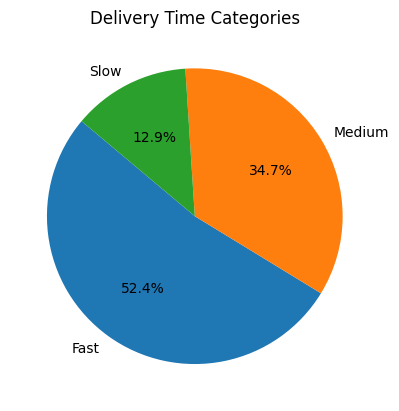

In [ ]:
plt.pie(df.delivery_time_category.value_counts(), 
        labels=df.delivery_time_category.value_counts().index, 
        autopct="%1.1f%%", 
        startangle=140)
plt.title("Delivery Time Categories")

>#### 2. Feature Engineering

`Temporal Features:`
- hour_of_day (from order_time)
- day_of_week
- is_weekend
- is_peak_hour (optional)

In [47]:
df["hour_of_day"] = df["order_time"].dt.hour
# Hour_of_day and order_hour are the same


df["day_of_week"] = df["order_time"].dt.dayofweek


# df["is_weekend"] (already exists)


In [ ]:
# To check
print(df[["order_id", "hour_of_day", "day_of_week", "is_weekend"]].head())

   order_id  order_hour  hour_of_day  day_of_week  is_weekend
0    556753           2            2            1       False
1    556754           2            2            1       False
2    556755           2            2            1       False
3    556756           2            2            1       False
4    556757           3            3            1       False


`Rider Features:`
- rider_experience = lifetime_ordercount
- recent_success_rate = delivered_orders / (delivered_orders + undelivered_orders)
- recent_activity = allotted_orders (last 30 days)
- online_duration = session_time (normalized)

In [52]:
df['rider_experience'] = df['lifetime_order_count'].apply(lambda x: 'High' if x >= 500 else ('Medium' if x >= 200 else 'Low'))

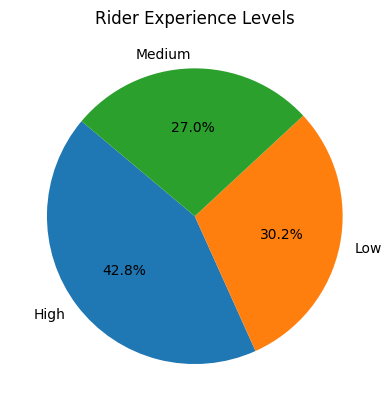

In [58]:
plt.pie(df.rider_experience.value_counts(),
        labels=df.rider_experience.value_counts().index,
          autopct="%1.1f%%", startangle=140)
plt.title("Rider Experience Levels")
plt.show()

In [ ]:
# Logic of the recent_activity and alloted_orders is same
df["recent_activity"] = df["alloted_orders"].copy()
df["recent_activity"]

0         46.0
1          8.0
2          1.0
3          1.0
4         34.0
          ... 
449995     4.0
449996    81.0
449997    28.0
449998    72.0
449999    30.0
Name: recent_activity, Length: 449999, dtype: float64

In [ ]:
# z - score normalization is applied (we can also use min-max normalization)

df['online_duration'] = (
    (df['session_time'] - df['session_time'].mean()) /
    df['session_time'].std()
)

`Distance Features:`
- total_distance = first_mile + last_mile

In [71]:
df["total_distance"] = df["first_mile_distance"] + df["last_mile_distance"]


In [76]:
df.total_distance.head()

0    4.2166
1    5.2807
2    7.0074
3    8.5694
4    6.7970
Name: total_distance, dtype: float64

`Operational Features:`
- is_reassigned_order (from reassigned_order)
- reassignment_type (encoded from reassignment_method)

##### ------> Skipped for now

## <u>Model Building</u>

>Model 1 : Cancellation Prediction

Binary classification

`Target:` will_cancel<br>
`Features:` hour_of_day, rider_experience, recent_success_rate,first_mile_distance, total_distance, is_reassigned_order<br>
`Algorithm:` Logistic Regression or Random Forest<br>
`Metric:` Focus on Recall (catch cancellations early)<br>

> Model 2 : Delivery Time Prediction(optional)<br><br>
> Model 3 : Rider Performance Score(optional)

#### <u>PRESENTATION & DOCUMENTATION</u>

`quickbite_analysis/`<br>
├── `data/`         &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;# Dataset (or instructions to get it)<br>
├── `notebooks/`<br>
│   ├── `01_eda.ipynb`      &emsp;&emsp;&emsp;&ensp;# Phase 1: EDA<br>
│   ├── `02_modeling.ipynb`  &nbsp; # Phase 2: Models<br>
│   └── `03_insights.ipynb`  &nbsp; # Phase 3: Analysis<br>
├── `dashboard/`<br>
│   └── `app.py`       &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  &nbsp;     # Streamlit dashboard<br>
├── `models/`<br>
│   └── `saved_models.pkl`   &emsp; # Trained models<br>
├── `reports/`<br>
│   └──`business_report.pdf` # Recommendations<br>
├── `requirements.txt`      &emsp;&ensp;&ensp;  # Python packages<br>
└── `README.md`  &emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;    # Project documentation<br>

>SAMPLE QUESTIONS
1. What time of day has highest cancellation rate?
2. Do experienced riders (high lifetime_ordercount) deliver faster?
3. Is first_mile_distance or last_mile_distance more important for delivery time?
4. What rider characteristics predict successful delivery?
5. Should reassigned orders go to specific rider types?